### Business Understanding:

Based on data given, Seattle has experienced a 194673 road accidents in the past 16 years. which caused: death & injured 157943 persons, 265233 damaged vehicles, and 679 damaged bicycles. Our target in this study is to detrmine the most reasons of road accidents, and prediction to save lives & properties, which considered a resposibility of all audinees; local govurnment, citizens, and police department.

### Data Understanding:

The data was collected by the Seattle Police Department and Accident Traffic Records Department from 2004 to May 2020. The data contain 38 columns, and 194673 raws. The dependent variable is “SEVERITYCODE”. and 37 attributes. It contain some attributes not important to this study, which gives more description of accidents. For example "SDOTCOLNUM","X", "Y", "INCDTTM", "INCDATE", "REPORTNO", "COLDETKEY", "INCKEY" and "OBJECTID". Moreover, "EXCEPTRSNCODE", "EXCEPTRSNDESC", "PEDROWNOTGRNT", "SPEEDING", "INATTENTIONIND", have a high number of missing data that would skew and bias our predictive model.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import preprocessing
from scipy import stats
import scipy as sp
import random
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import pydotplus
import matplotlib.image as mpimg
from io import StringIO
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import folium
import webbrowser
from folium import plugins

### Data Pre-processing and Exploration

In [42]:
df = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')
df.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [43]:
descriptive_stats= df.describe(include="all")
descriptive_stats

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,194673,194673,192747,65070.000000,...,189661,189503,4667,1.149360e+05,9333,194655,189769,194673.000000,1.946730e+05,194673
unique,NaN,NaN,NaN,NaN,NaN,NaN,194670,2,3,NaN,...,9,9,1,NaN,1,115,62,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,1782439,Matched,Block,NaN,...,Dry,Daylight,Y,NaN,Y,32,One parked--one moving,NaN,NaN,N
freq,NaN,NaN,NaN,NaN,NaN,NaN,2,189786,126926,NaN,...,124510,116137,4667,NaN,9333,27612,44421,NaN,NaN,187457
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,NaN,NaN,NaN,37558.450576,...,NaN,NaN,NaN,7.972521e+06,NaN,NaN,NaN,269.401114,9.782452e+03,NaN
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,NaN,NaN,NaN,51745.990273,...,NaN,NaN,NaN,2.553533e+06,NaN,NaN,NaN,3315.776055,7.226926e+04,NaN
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,NaN,NaN,NaN,23807.000000,...,NaN,NaN,NaN,1.007024e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,NaN,NaN,NaN,28667.000000,...,NaN,NaN,NaN,6.040015e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,NaN,NaN,NaN,29973.000000,...,NaN,NaN,NaN,8.023022e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,NaN,NaN,NaN,33973.000000,...,NaN,NaN,NaN,1.015501e+07,NaN,NaN,NaN,0.000000,0.000000e+00,NaN


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

Remove unmatched data

In [45]:
df["STATUS"].value_counts()

Matched      189786
Unmatched      4887
Name: STATUS, dtype: int64

In [46]:
df["SEVERITYCODE"].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

Balansing Data

In [47]:
df1=df[['SEVERITYCODE','LOCATION','ADDRTYPE','COLLISIONTYPE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','WEATHER','ROADCOND','LIGHTCOND','SPEEDING','INATTENTIONIND','UNDERINFL','HITPARKEDCAR']]
df1.head()

,SEVERITYCODE,LOCATION,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,INATTENTIONIND,UNDERINFL,HITPARKEDCAR
0,2,5TH AVE NE AND NE 103RD ST,Intersection,Angles,2,0,0,2,Overcast,Wet,Daylight,NaN,NaN,N,N
1,1,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Block,Sideswipe,2,0,0,2,Raining,Wet,Dark - Street Lights On,NaN,NaN,0,N
2,1,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Block,Parked Car,4,0,0,3,Overcast,Dry,Daylight,NaN,NaN,0,N
3,1,2ND AVE BETWEEN MARION ST AND MADISON ST,Block,Other,3,0,0,3,Clear,Dry,Daylight,NaN,NaN,N,N
4,2,SWIFT AVE S AND SWIFT AV OFF RP,Intersection,Angles,2,0,0,2,Raining,Wet,Daylight,NaN,NaN,0,N


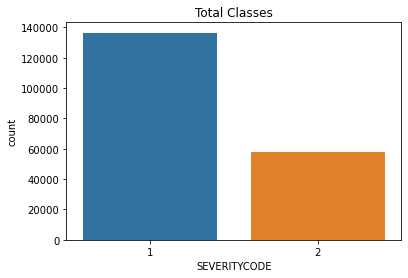

In [48]:
sns.countplot('SEVERITYCODE', data=df1)
plt.title('Total Classes')
plt.show()

In [49]:
df1_shuffled=df1.sample(frac=1,random_state=4)
df1_2=df1_shuffled.loc[df1_shuffled['SEVERITYCODE'] == 2]
df1_1=df1_shuffled.loc[df1_shuffled['SEVERITYCODE'] == 1].sample(n=57159,random_state=42)
df2 = pd.concat([df1_1, df1_2])
df2.shape

(115347, 15)

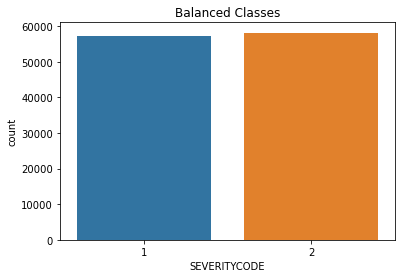

In [50]:
sns.countplot('SEVERITYCODE', data=df2)
plt.title('Balanced Classes')
plt.show()

Data Analysis

In [51]:
df2['COLLISIONTYPE'].value_counts()

Rear Ended    22792
Angles        22468
Parked Car    21633
Other         13456
Sideswipe      9333
Left Turn      8825
Pedestrian     6223
Cycles         5033
Right Turn     1597
Head On        1340
Name: COLLISIONTYPE, dtype: int64

In [52]:
df2.groupby(['COLLISIONTYPE'])['SEVERITYCODE'].value_counts(normalize=True)

COLLISIONTYPE  SEVERITYCODE
Angles         2               0.606374
               1               0.393626
Cycles         2               0.942579
               1               0.057421
Head On        2               0.650746
               1               0.349254
Left Turn      2               0.613144
               1               0.386856
Other          1               0.545779
               2               0.454221
Parked Car     1               0.876947
               2               0.123053
Pedestrian     2               0.953881
               1               0.046119
Rear Ended     2               0.643691
               1               0.356309
Right Turn     1               0.618660
               2               0.381340
Sideswipe      1               0.731490
               2               0.268510
Name: SEVERITYCODE, dtype: float64

<AxesSubplot:xlabel='COLLISIONTYPE', ylabel='count'>

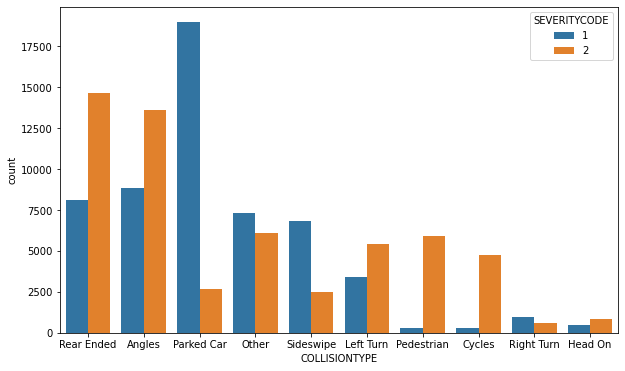

In [53]:
f, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x='COLLISIONTYPE', hue='SEVERITYCODE',data=df2,order=df2['COLLISIONTYPE'].value_counts().index)

In [54]:
Location=df2['LOCATION'].value_counts()
Location[0:15]

AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST                                          174
BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB                          170
6TH AVE AND JAMES ST                                                                    163
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N                                162
BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N                          157
AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST                                          150
RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLELLAN ST                                   149
ALASKAN WY VI NB BETWEEN S ROYAL BROUGHAM WAY ON RP AND SENECA ST OFF RP                138
WEST SEATTLE BR EB BETWEEN ALASKAN WY VI NB ON RP AND DELRIDGE-W SEATTLE BR EB ON RP    134
ALASKAN WY VI SB BETWEEN COLUMBIA ST ON RP AND ALASKAN WY VI SB EFR OFF RP              127
AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N                                      

In [55]:
df2.groupby(['LOCATION'])['SEVERITYCODE'].value_counts(normalize=True)

LOCATION                                      SEVERITYCODE
10TH AVE AND E JEFFERSON ST                   1               0.833333
                                              2               0.166667
10TH AVE AND E MADISON ST                     1               0.875000
                                              2               0.125000
10TH AVE AND E PIKE ST                        2               0.642857
                                                                ...   
YESLER WAY BETWEEN WESTERN AVE AND POST AVE   2               0.500000
YORK RD S BETWEEN 36TH AVE S AND 37TH AVE S   1               0.666667
                                              2               0.333333
YORK RD S BETWEEN S HORTON ST AND 36TH AVE S  2               1.000000
YUKON AVE S AND S HENDERSON ST                2               1.000000
Name: SEVERITYCODE, Length: 29014, dtype: float64

In [56]:
df2['ADDRTYPE'].value_counts()

Block           70669
Intersection    43426
Alley             358
Name: ADDRTYPE, dtype: int64

In [57]:
df2.groupby(['ADDRTYPE'])['SEVERITYCODE'].value_counts(normalize=True)

ADDRTYPE      SEVERITYCODE
Alley         1               0.770950
              2               0.229050
Block         1               0.574127
              2               0.425873
Intersection  2               0.640607
              1               0.359393
Name: SEVERITYCODE, dtype: float64

<AxesSubplot:xlabel='ADDRTYPE', ylabel='count'>

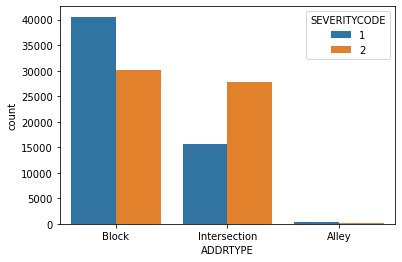

In [58]:
sns.countplot(x='ADDRTYPE', hue='SEVERITYCODE',data=df2, order=df2['ADDRTYPE'].value_counts().index)

In [59]:
df2['ADDRTYPE'].replace(to_replace=['Alley','Block','Intersection'],value=[0,1,2],inplace=True)

In [60]:
df2['PEDCOUNT'].value_counts()

0    108811
1      6294
2       214
3        22
4         4
6         1
5         1
Name: PEDCOUNT, dtype: int64

In [61]:
df2.groupby(['PEDCOUNT'])['SEVERITYCODE'].value_counts(normalize=True)

PEDCOUNT  SEVERITYCODE
0         1               0.522594
          2               0.477406
1         2               0.954401
          1               0.045599
2         2               0.967290
          1               0.032710
3         2               0.954545
          1               0.045455
4         2               1.000000
5         2               1.000000
6         2               1.000000
Name: SEVERITYCODE, dtype: float64

<AxesSubplot:xlabel='PEDCOUNT', ylabel='count'>

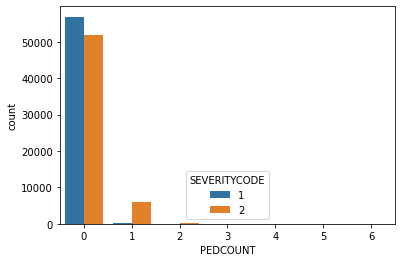

In [62]:
sns.countplot(x="PEDCOUNT", hue="SEVERITYCODE", data=df2)

In [63]:
df2['PEDCYLCOUNT'].value_counts()

0    110249
1      5055
2        43
Name: PEDCYLCOUNT, dtype: int64

In [64]:
df2.groupby(['PEDCYLCOUNT'])['SEVERITYCODE'].value_counts(normalize=True)

PEDCYLCOUNT  SEVERITYCODE
0            1               0.515796
             2               0.484204
1            2               0.942038
             1               0.057962
2            2               1.000000
Name: SEVERITYCODE, dtype: float64

<AxesSubplot:xlabel='PEDCYLCOUNT', ylabel='count'>

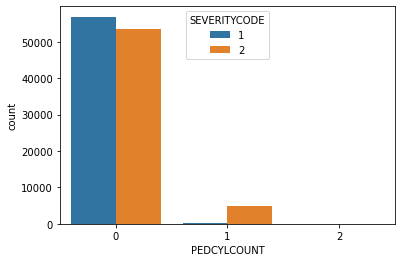

In [65]:
sns.countplot(x="PEDCYLCOUNT", hue="SEVERITYCODE", data=df2)

In [66]:
df2['VEHCOUNT'].value_counts()

2     82715
1     18977
3      8674
0      2830
4      1635
5       366
6        98
7        30
8         9
9         8
11        3
10        2
Name: VEHCOUNT, dtype: int64

In [67]:
df2.groupby(['VEHCOUNT'])['SEVERITYCODE'].value_counts(normalize=True)

VEHCOUNT  SEVERITYCODE
0         1               0.566431
          2               0.433569
1         2               0.743268
          1               0.256732
2         1               0.565387
          2               0.434613
3         2               0.630620
          1               0.369380
4         2               0.659327
          1               0.340673
5         2               0.713115
          1               0.286885
6         2               0.612245
          1               0.387755
7         2               0.733333
          1               0.266667
8         2               0.555556
          1               0.444444
9         2               0.750000
          1               0.250000
10        2               1.000000
11        2               1.000000
Name: SEVERITYCODE, dtype: float64

<AxesSubplot:xlabel='VEHCOUNT', ylabel='count'>

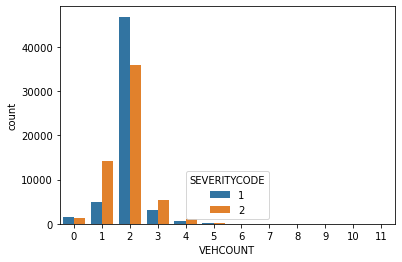

In [68]:
sns.countplot(x="VEHCOUNT", hue="SEVERITYCODE", data=df2)

In [69]:
df2['WEATHER'].value_counts()

Clear                       67443
Raining                     20386
Overcast                    16637
Unknown                      6767
Snowing                       463
Other                         438
Fog/Smog/Smoke                355
Sleet/Hail/Freezing Rain       60
Blowing Sand/Dirt              34
Severe Crosswind               12
Partly Cloudy                   3
Name: WEATHER, dtype: int64

In [70]:
df2.groupby(['WEATHER'])['SEVERITYCODE'].value_counts(normalize=True)

WEATHER                   SEVERITYCODE
Blowing Sand/Dirt         1               0.558824
                          2               0.441176
Clear                     2               0.531412
                          1               0.468588
Fog/Smog/Smoke            2               0.526761
                          1               0.473239
Other                     1               0.735160
                          2               0.264840
Overcast                  2               0.525636
                          1               0.474364
Partly Cloudy             2               1.000000
Raining                   2               0.548219
                          1               0.451781
Severe Crosswind          2               0.583333
                          1               0.416667
Sleet/Hail/Freezing Rain  1               0.533333
                          2               0.466667
Snowing                   1               0.630670
                          2               0

In [71]:
df2['WEATHER'].replace(to_replace=['Other','Unknown','Clear','Raining','Overcast','Snowing','Fog/Smog/Smoke','Sleet/Hail/Freezing Rain','Blowing Sand/Dirt','Severe Crosswind','Partly Cloudy'],value=[0,0,1,3,2,3,3,3,3,3,2],inplace=True)
indexNames = df2[df2['WEATHER'] == 0 ].index
df2.drop(indexNames, inplace=True)
df2['WEATHER'].value_counts()

1.0    67443
3.0    21310
2.0    16640
Name: WEATHER, dtype: int64

In [72]:
df2['ROADCOND'].value_counts()

Dry               74928
Wet               28753
Ice                 603
Snow/Slush          470
Unknown             467
Other                75
Standing Water       68
Sand/Mud/Dirt        40
Oil                  39
Name: ROADCOND, dtype: int64

In [73]:
df2.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts(normalize=True)

ROADCOND        SEVERITYCODE
Dry             2               0.532271
                1               0.467729
Ice             1               0.562189
                2               0.437811
Oil             2               0.615385
                1               0.384615
Other           2               0.546667
                1               0.453333
Sand/Mud/Dirt   2               0.550000
                1               0.450000
Snow/Slush      1               0.655319
                2               0.344681
Standing Water  1               0.558824
                2               0.441176
Unknown         1               0.751606
                2               0.248394
Wet             2               0.544500
                1               0.455500
Name: SEVERITYCODE, dtype: float64

In [74]:
df2['ROADCOND'].replace(to_replace=['Other','Unknown','Dry','Wet','Ice','Snow/Slush','Standing Water','Sand/Mud/Dirt','Oil'],value=[0,0,1,2,3,3,3,2,2],inplace=True)
indexNames = df2[df2['ROADCOND'] == 0 ].index
df2.drop(indexNames, inplace=True)
df2.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts(normalize=True)

ROADCOND  SEVERITYCODE
1.0       2               0.532271
          1               0.467729
2.0       2               0.544603
          1               0.455397
3.0       1               0.600351
          2               0.399649
Name: SEVERITYCODE, dtype: float64

In [75]:
df2['LIGHTCOND'].value_counts()

Daylight                    69503
Dark - Street Lights On     27822
Dusk                         3449
Dawn                         1472
Unknown                      1085
Dark - No Street Lights       761
Dark - Street Lights Off      637
Other                         101
Dark - Unknown Lighting         6
Name: LIGHTCOND, dtype: int64

In [76]:
df2.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts(normalize=True)

LIGHTCOND                 SEVERITYCODE
Dark - No Street Lights   1               0.576873
                          2               0.423127
Dark - Street Lights Off  1               0.514914
                          2               0.485086
Dark - Street Lights On   2               0.513514
                          1               0.486486
Dark - Unknown Lighting   1               0.500000
                          2               0.500000
Dawn                      2               0.547554
                          1               0.452446
Daylight                  2               0.548120
                          1               0.451880
Dusk                      2               0.552624
                          1               0.447376
Other                     1               0.534653
                          2               0.465347
Unknown                   1               0.781567
                          2               0.218433
Name: SEVERITYCODE, dtype: float64

In [77]:
df2['LIGHTCOND'].replace(to_replace=['Other','Unknown','Daylight','Dark - Street Lights On','Dusk','Dawn','Dark - No Street Lights','Dark - Street Lights Off','Dark - Unknown Lighting'],value=[0,0,1,3,2,2,4,4,4],inplace=True)
indexNames = df2[df2['LIGHTCOND'] == 0 ].index
df2.drop(indexNames, inplace=True)
df2.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts(normalize=True)

LIGHTCOND  SEVERITYCODE
1.0        2               0.548120
           1               0.451880
2.0        2               0.551107
           1               0.448893
3.0        2               0.513514
           1               0.486486
4.0        1               0.548433
           2               0.451567
Name: SEVERITYCODE, dtype: float64

In [79]:
df2['SPEEDING'].value_counts()

Y    5795
Name: SPEEDING, dtype: int64

In [80]:
values = {'SPEEDING': 0, 'INATTENTIONIND': 0}
df2=df2.fillna(value=values)

In [81]:
df2['HITPARKEDCAR'].value_counts()

N    104034
Y      2380
Name: HITPARKEDCAR, dtype: int64

Treat na and missing data

In [82]:
df2['SPEEDING'].replace(to_replace=['Y'],value=[1],inplace=True)
df2['INATTENTIONIND'].replace(to_replace=['Y'],value=[1],inplace=True)
df2['UNDERINFL'].replace(to_replace=['N','0','Y','1'],value=[0,0,1,1],inplace=True)
df2['HITPARKEDCAR'].replace(to_replace=['N','Y'],value=[0,1],inplace=True)

In [83]:
df2=df2.dropna(how='any')
df2.reset_index(drop=True,inplace=True)
df2

,SEVERITYCODE,LOCATION,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,INATTENTIONIND,UNDERINFL,HITPARKEDCAR
0,1,9TH AVE N BETWEEN ROY ST AND WESTLAKE AVE N,1.0,Rear Ended,2,0,0,2,1.0,1.0,3.0,0,1,0.0,0
1,1,STONE WAY N AND N 38TH ST,2.0,Angles,3,0,0,2,1.0,1.0,1.0,0,0,0.0,0
2,1,NE 125TH ST BETWEEN 17TH E AVE NE AND 19TH AVE NE,1.0,Rear Ended,2,0,0,2,1.0,1.0,1.0,0,0,0.0,0
3,1,ROOSEVELT WAY NE AND NE 55TH ST,2.0,Angles,2,0,0,2,1.0,1.0,1.0,0,0,0.0,0
4,1,ROOSEVELT WAY NE AND NE 40TH ALLEY ST,2.0,Cycles,2,0,1,1,1.0,1.0,1.0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102862,2,3RD AVE AND MADISON ST,2.0,Angles,4,0,0,2,1.0,2.0,3.0,0,0,0.0,0
102863,2,DENNY WAY BETWEEN WESTLAKE AVE AND TERRY AVE,1.0,Head On,7,0,0,5,1.0,1.0,1.0,0,0,0.0,0
102864,2,GLENWILDE PL E BETWEEN E ROANOKE ST AND DEAD END,1.0,Cycles,3,0,1,1,1.0,1.0,1.0,0,0,0.0,0
102865,2,BOREN AVE BETWEEN SPRING ST AND SENECA ST,1.0,Rear Ended,3,0,0,2,1.0,1.0,1.0,0,0,0.0,0


In [84]:
df2['UNDERINFL'].value_counts()

0.0    97142
1.0     5725
Name: UNDERINFL, dtype: int64

In [85]:
df2.groupby(['UNDERINFL'])['SEVERITYCODE'].value_counts(normalize=True)

UNDERINFL  SEVERITYCODE
0.0        2               0.534908
           1               0.465092
1.0        2               0.609782
           1               0.390218
Name: SEVERITYCODE, dtype: float64

<AxesSubplot:xlabel='UNDERINFL', ylabel='count'>

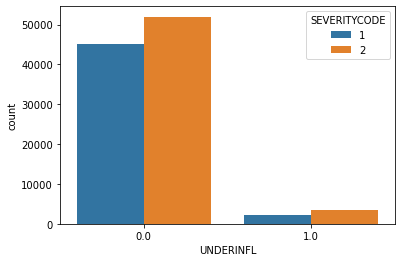

In [86]:
sns.countplot(x="UNDERINFL", hue="SEVERITYCODE", data=df2)

In [87]:
df2.groupby(['SPEEDING'])['SEVERITYCODE'].value_counts(normalize=True)

SPEEDING  SEVERITYCODE
0         2               0.535530
          1               0.464470
1         2               0.599094
          1               0.400906
Name: SEVERITYCODE, dtype: float64

<AxesSubplot:xlabel='SPEEDING', ylabel='count'>

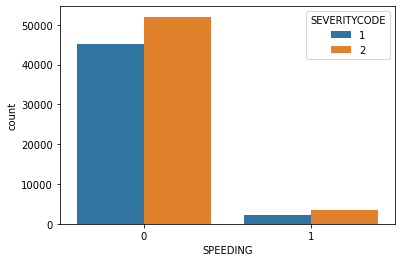

In [88]:
sns.countplot(x="SPEEDING", hue="SEVERITYCODE", data=df2)

In [89]:
from sklearn.linear_model import LinearRegression
X=df2[['WEATHER']]
Y=df2[['ROADCOND']]
lm=LinearRegression()
lm.fit(X,Y)
Yhat=lm.predict(X)
lm.score(X,Y)

0.6106006108920026

### Final Feature Selection for Modeling

In [90]:
X=df2[['ADDRTYPE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','WEATHER','LIGHTCOND','SPEEDING','INATTENTIONIND','UNDERINFL','HITPARKEDCAR']]
X.reset_index(drop=True,inplace=True)
X.head()

,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,WEATHER,LIGHTCOND,SPEEDING,INATTENTIONIND,UNDERINFL,HITPARKEDCAR
0,1.0,2,0,0,2,1.0,3.0,0,1,0.0,0
1,2.0,3,0,0,2,1.0,1.0,0,0,0.0,0
2,1.0,2,0,0,2,1.0,1.0,0,0,0.0,0
3,2.0,2,0,0,2,1.0,1.0,0,0,0.0,0
4,2.0,2,0,1,1,1.0,1.0,0,0,0.0,0


In [91]:
y = df2['SEVERITYCODE'].values
y[0:5]

array([1, 1, 1, 1, 1])

### Decision Tree

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (82293, 11) (82293,)
Test set: (20574, 11) (20574,)


In [109]:
from sklearn.tree import DecisionTreeClassifier
Tree = DecisionTreeClassifier(criterion="entropy", max_depth =5)
Tree.fit(X_train,y_train)
Tree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [110]:
yhat = Tree.predict(X_test)
yhat

array([2, 1, 2, ..., 2, 1, 2])

In [111]:
from sklearn import metrics
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, yhat))

DecisionTrees's Accuracy:  0.6440167201322057


In [112]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       0.63      0.54      0.58      9392
           2       0.65      0.73      0.69     11182

   micro avg       0.64      0.64      0.64     20574
   macro avg       0.64      0.64      0.64     20574
weighted avg       0.64      0.64      0.64     20574



In [113]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

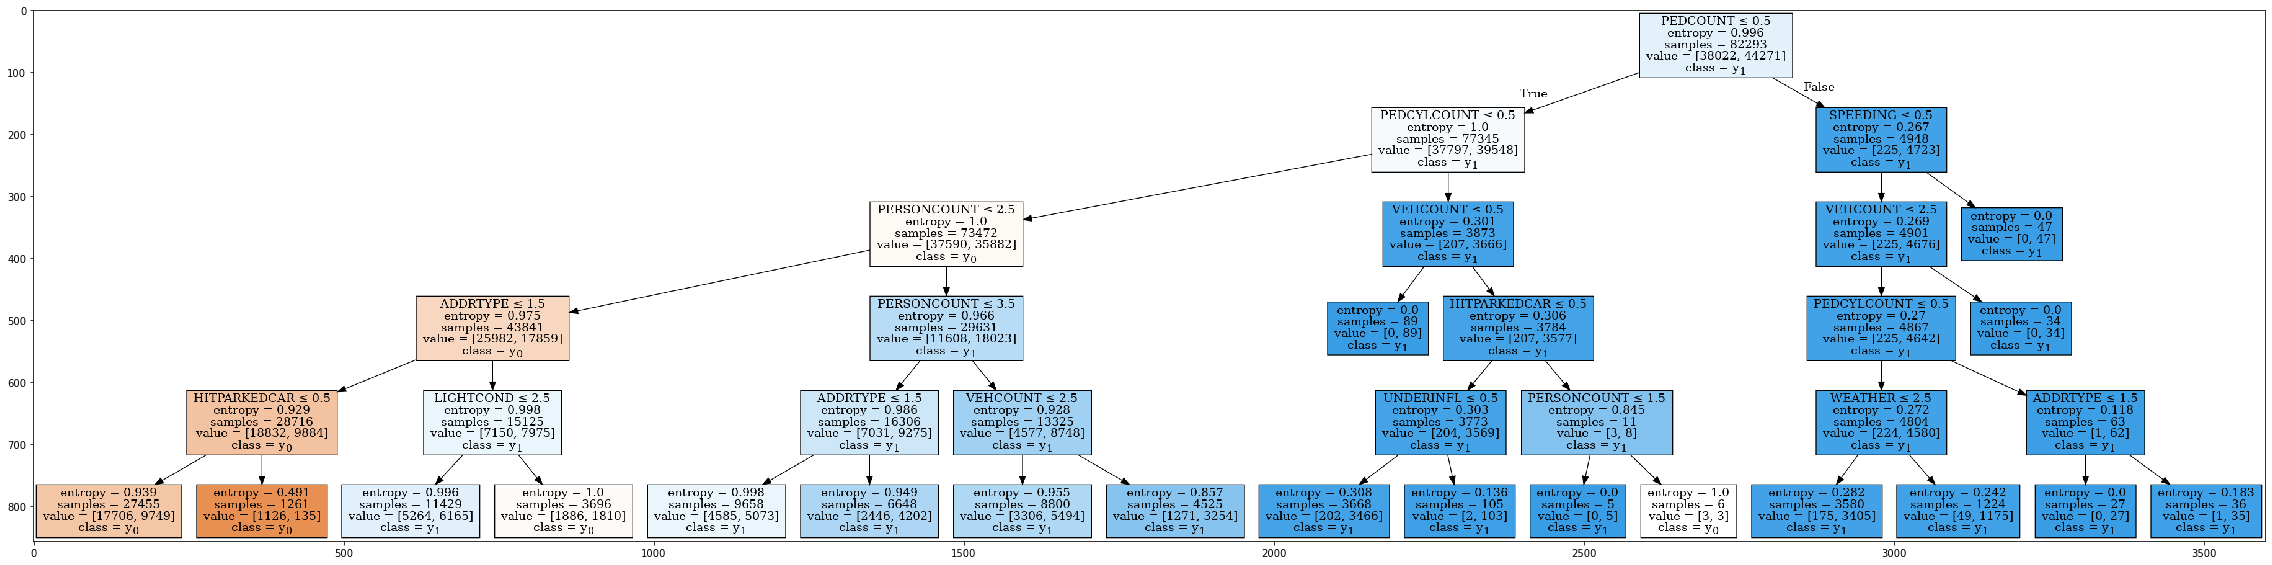

In [114]:
dot_data = StringIO()
filename = "accidenttree.png"
featureNames = X.columns[0:11]
targetNames = df2["SEVERITYCODE"].unique().tolist()
out=tree.export_graphviz(Tree,feature_names=featureNames,out_file=dot_data,class_names=True,filled=True,special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
plt.figure(figsize=(40, 40))
img = mpimg.imread(filename)
plt.imshow(img,interpolation='nearest')

### Looking at accident causes only

In [115]:
X1=df2[['ADDRTYPE','WEATHER','LIGHTCOND','SPEEDING','INATTENTIONIND','UNDERINFL']]
X1.reset_index(drop=True,inplace=True)
X1.head()

,ADDRTYPE,WEATHER,LIGHTCOND,SPEEDING,INATTENTIONIND,UNDERINFL
0,1.0,1.0,3.0,0,1,0.0
1,2.0,1.0,1.0,0,0,0.0
2,1.0,1.0,1.0,0,0,0.0
3,2.0,1.0,1.0,0,0,0.0
4,2.0,1.0,1.0,0,0,0.0


In [126]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=10)
Tree1 = DecisionTreeClassifier(criterion="entropy", max_depth =5)
Tree1.fit(X_train,y_train)
yhat1 = Tree1.predict(X_test)
yhat1

array([1, 2, 2, ..., 1, 2, 1])

In [127]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, yhat1))
print (classification_report(y_test, yhat1))

DecisionTrees's Accuracy:  0.5998185412008684
              precision    recall  f1-score   support

           1       0.58      0.51      0.54     14269
           2       0.62      0.68      0.65     16592

   micro avg       0.60      0.60      0.60     30861
   macro avg       0.60      0.59      0.59     30861
weighted avg       0.60      0.60      0.60     30861



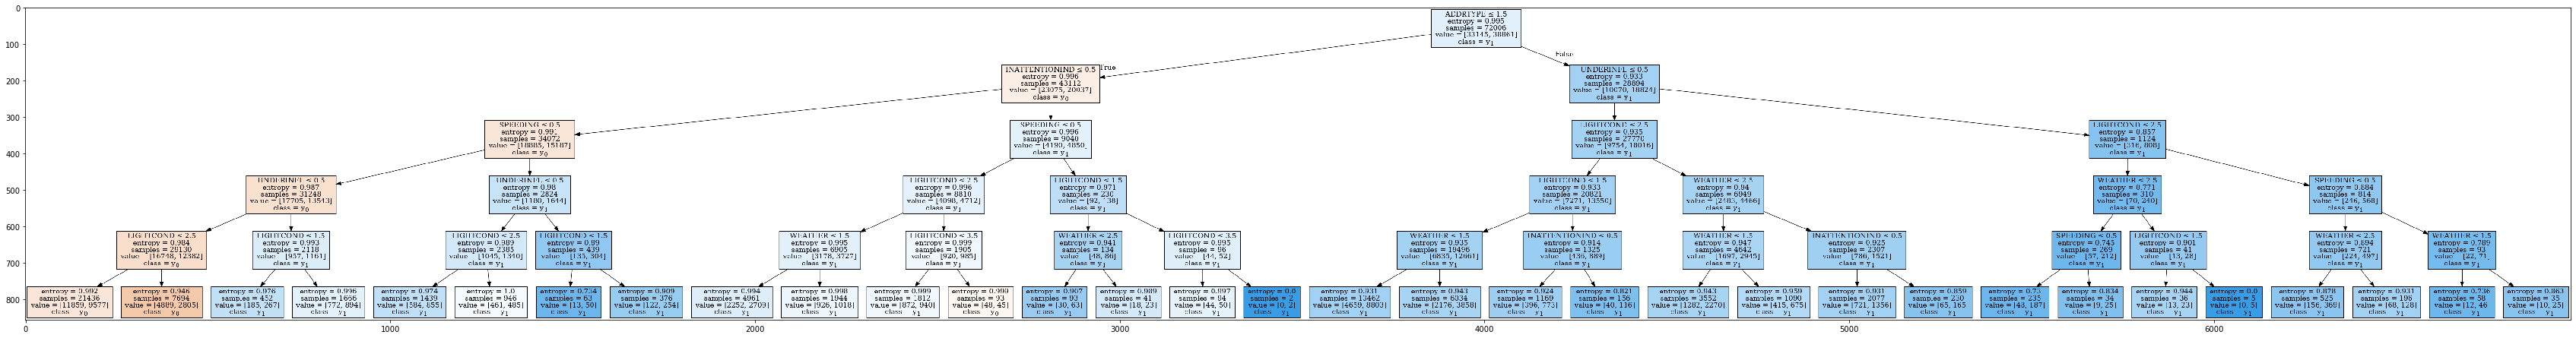

In [128]:
dot_data = StringIO()
filename = "accidenttree1.png"
featureNames = X1.columns[0:6]
targetNames = df2["SEVERITYCODE"].unique().tolist()
out=tree.export_graphviz(Tree1,feature_names=featureNames,out_file=dot_data,class_names=True,filled=True,special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
plt.figure(figsize=(60, 60))
img = mpimg.imread(filename)
plt.imshow(img,interpolation='nearest')